<a href="https://colab.research.google.com/github/sarthaksaxena679/Stock_Price_Prediction/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the necessary libraries**

In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# **Define start day to fetch the dataset from the yahoo finance library**

The data is from the start of 2010-01-01 to the present day of  the stocks of  a given company


In [ ]:
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,292.732025,295.555556,291.719434,293.958786,1963682
1,2010-01-05,292.810059,295.808850,290.745964,294.036844,2014488
2,2010-01-06,286.189301,292.946319,285.468823,292.809996,3349176
3,2010-01-07,278.224945,287.961260,276.900797,286.442385,6474892
4,2010-01-08,272.538849,279.821615,271.253660,278.847984,6048178


In [ ]:
df = df.drop(['Date'], axis = 1)
df.head()

<ipython-input-11-e54f1e21f52c>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,292.732025,295.555556,291.719434,293.958786,1963682
1,292.810059,295.808850,290.745964,294.036844,2014488
2,286.189301,292.946319,285.468823,292.809996,3349176
3,278.224945,287.961260,276.900797,286.442385,6474892
4,272.538849,279.821615,271.253660,278.847984,6048178


## **Visualizing the closing price**

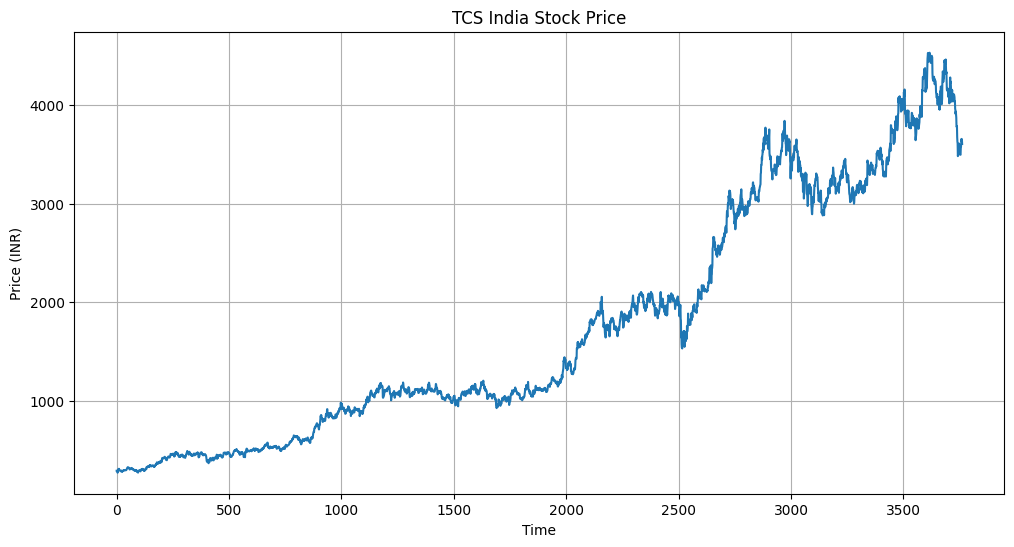

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Time")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [ ]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,292.732025,295.555556,291.719434,293.958786,1963682
1,292.810059,295.808850,290.745964,294.036844,2014488
2,286.189301,292.946319,285.468823,292.809996,3349176
3,278.224945,287.961260,276.900797,286.442385,6474892
4,272.538849,279.821615,271.253660,278.847984,6048178
...,...,...,...,...,...
3757,3628.949951,3649.750000,3566.600098,3600.000000,1834751
3758,3657.750000,3710.000000,3638.000000,3645.000000,3135390
3759,3635.800049,3680.500000,3625.850098,3647.750000,1734499


## **Calculating moving averages of 100 days**

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3757,4030.181772
3758,4026.009880
3759,4022.777727
3760,4019.542446


## **Visualize moving averages of 100 days**

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

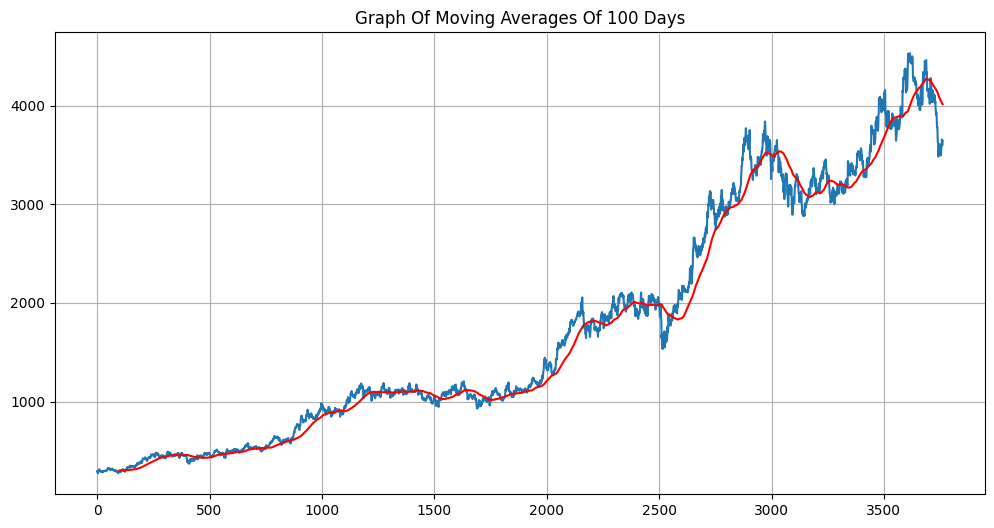

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

## **Calculate moving averages of 200 days**

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3757,4106.779547
3758,4106.052494
3759,4104.900200
3760,4103.999902


## **Comparison of moving averages of 100 vs 200 days**

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

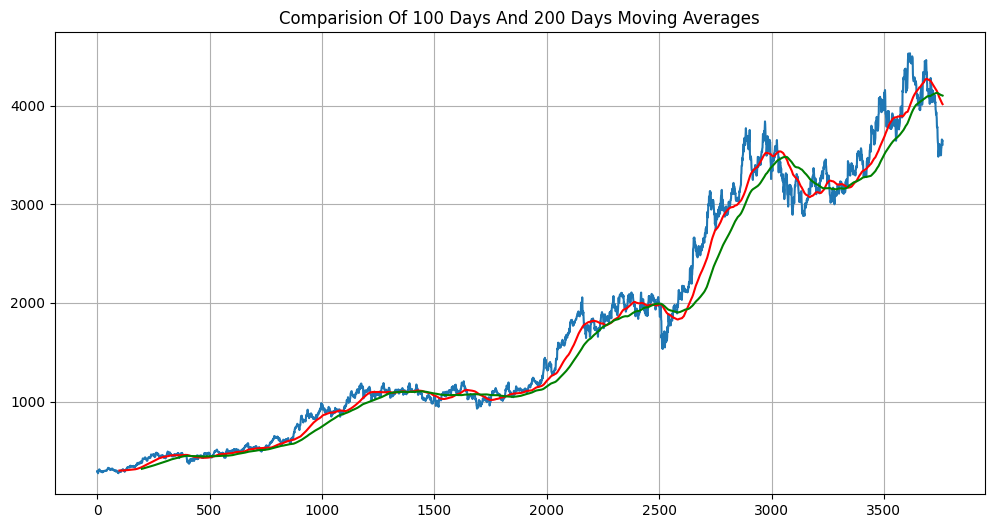

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

The moving averages of 100 days was closer to rhe actual closing price removing the daily fluctuations and noise

In [ ]:
df.shape

(3762, 5)

## **Split the data into training and testing**

In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2633, 6)
(1129, 6)


In [ ]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,292.732025,295.555556,291.719434,293.958786,1963682
1,2010-01-05,292.810059,295.808850,290.745964,294.036844,2014488
2,2010-01-06,286.189301,292.946319,285.468823,292.809996,3349176
3,2010-01-07,278.224945,287.961260,276.900797,286.442385,6474892
4,2010-01-08,272.538849,279.821615,271.253660,278.847984,6048178


In [ ]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2633,2020-09-08,2210.404297,2250.175008,2190.495500,2198.873144,7453998
2634,2020-09-09,2191.059326,2220.569745,2183.858334,2188.564925,3866535
2635,2020-09-10,2194.353760,2210.685722,2187.905868,2197.977927,2308813
2636,2020-09-11,2234.783936,2243.161577,2193.412811,2194.165912,4145424
2637,2020-09-14,2345.200928,2358.708941,2242.079665,2244.197632,7512131


# **Normalization of the dataset**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01037013],
       [0.01041104],
       [0.00976797],
       ...,
       [0.97532976],
       [0.97878336],
       [0.98569125]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2533, 100, 1)

## **ML MODEL(LSTM)**

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

## **Training the model**

In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - loss: 0.0820 - mean_absolute_error: 0.1965
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 0.0099 - mean_absolute_error: 0.0674
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0069 - mean_absolute_error: 0.0576
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0066 - mean_absolute_error: 0.0561
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0066 - mean_absolute_error: 0.0552
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0056 - mean_absolute_error: 0.0495
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0052 - mean_absolute_error: 0.0485
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0056 - mean_absolute_error: 0.0485
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0046 - mean_absolute_error: 0.0446
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0043 - mean_absolute_error: 0.0433
Epoch 11/100
80/80 ━━━━━━━━

In [ ]:
model.save('keras_model.h5')

In [ ]:
test_close.shape

(1129, 1)

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

In [ ]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [ ]:
final_df.head()

,0
0,1685.625764
1,1713.719850
2,1652.849796
3,1627.237533
4,1666.896612


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01994969],
       [0.02954869],
       [0.00875102],
       ...,
       [0.69035496],
       [0.67911394],
       [0.69146539]])

In [ ]:
input_data.shape

(1229, 1)

In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1129, 100, 1)
(1129,)


In [ ]:

y_pred = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step


In [ ]:
y_pred.shape

(1129, 1)

In [ ]:

y_test

array([0.19531257, 0.19179053, 0.1950067 , ..., 0.69035496, 0.67911394,
       0.69146539])

In [ ]:
y_pred

array([[0.21471494],
       [0.21514729],
       [0.2158911 ],
       ...,
       [0.62784815],
       [0.63947654],
       [0.65082955]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00034167])

In [ ]:
scale_factor = 1/0.00034167
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

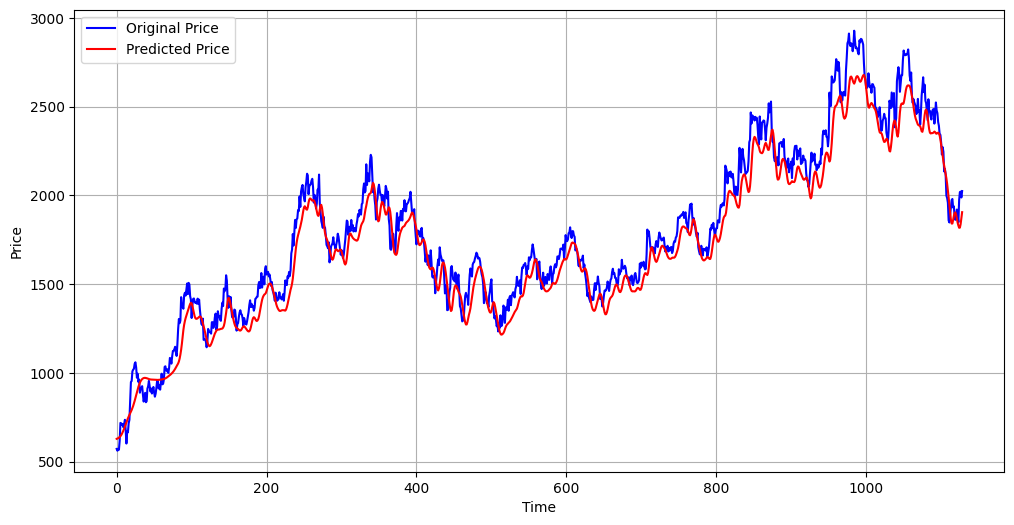

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# **Model evaluation**

Calculation of mean absolute error

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 5.18%


In [ ]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9423632156555786


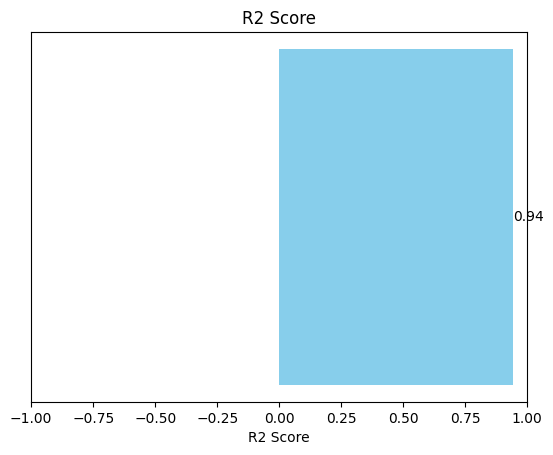

In [ ]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

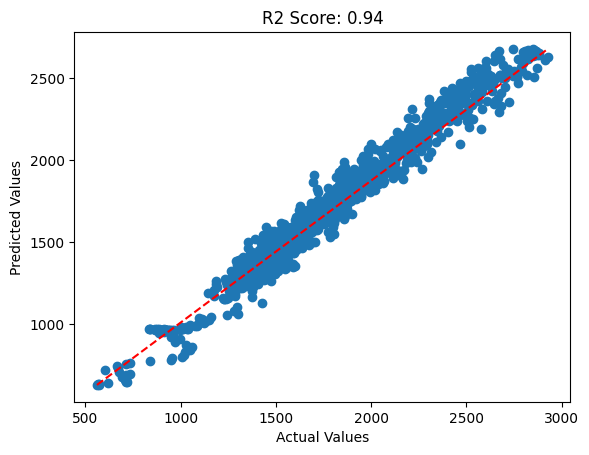

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()